<a href="https://colab.research.google.com/github/Lavan1999/Dataset-22_WaterQualityAndProbability_/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split

#Machine Learning
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


#Machine Learning Evaluation
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score, accuracy_score,  confusion_matrix,  # Classification

In [ ]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Google drive
file_path = '/content/drive/My Drive/Dataset/water_potability.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Data Observation**

In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
# Dependent -'Potability'
# Independent -['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
#               'Organic_carbon', 'Trihalomethanes', 'Turbidity']

continuous_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
category_columns = ['Potability']

#Supervised

# **Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.Sulfate.value_counts()

Sulfate
368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517    1
389.219586    1
337.231469    1
396.091917    1
359.948574    1
Name: count, Length: 2495, dtype: int64

In [ ]:
df.ph.fillna(method = 'bfill', inplace = True)
df.Sulfate.fillna(method = 'ffill', inplace = True)

In [ ]:
df['Trihalomethanes'].fillna(value = df['Trihalomethanes'].mean(), inplace = True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

# **Statistical Analysis/ Hypothesis Testing**

In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# **Correlation Test**

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


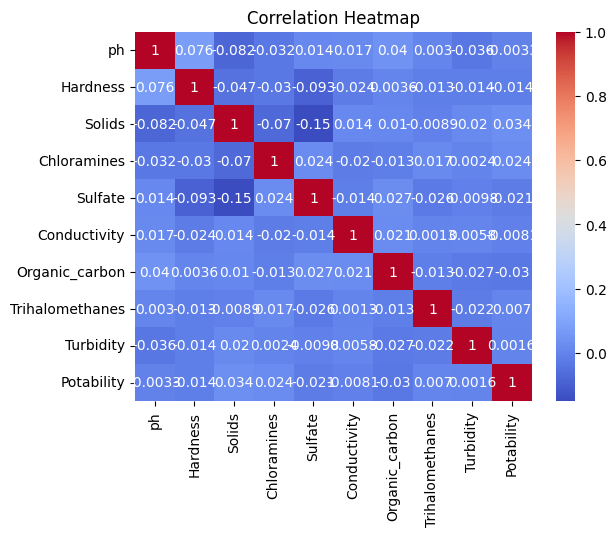

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Hypothesis Testing**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
Population Mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.28497,66.396293,3.966786
Sample Means,{7.074910474169907},{196.1479874751024},{21944.20133406426},{7.11545367404724},{333.4755824551163},{426.78196097823377},{14.301118009157488},{66.5235148722068},{3.9626216106644763}
H0_accepted,328,339,313,361,328,333,339,324,342
H0_rejected,327,316,342,294,327,322,316,331,313
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si..."


In [ ]:
comperativeColumn_result

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Hardness,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Solids,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Chloramines,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Sulfate,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Conductivity,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Organic_carbon,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
Trihalomethanes,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship
Turbidity,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship
Potability,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,NaN


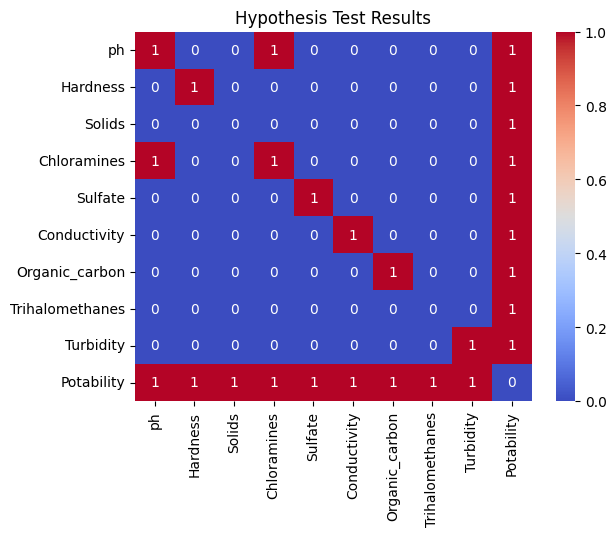

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


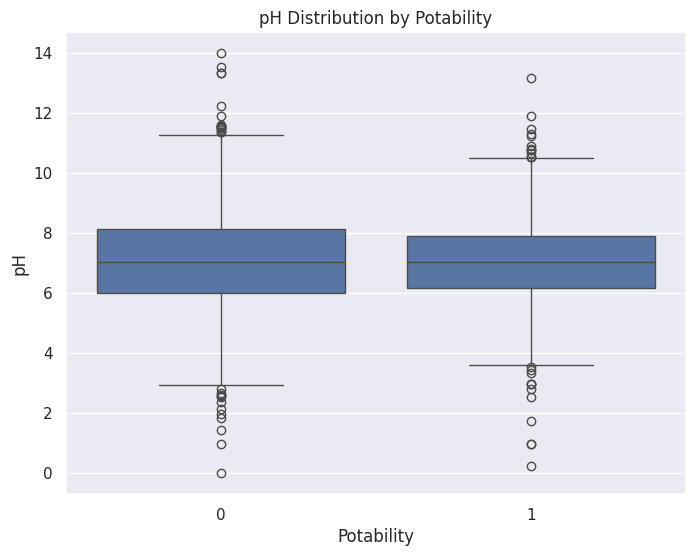

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='ph', data=df)
plt.title('pH Distribution by Potability')
plt.xlabel('Potability')
plt.ylabel('pH')
plt.show()


Text(0.5, 1.0, 'pH Distribution')

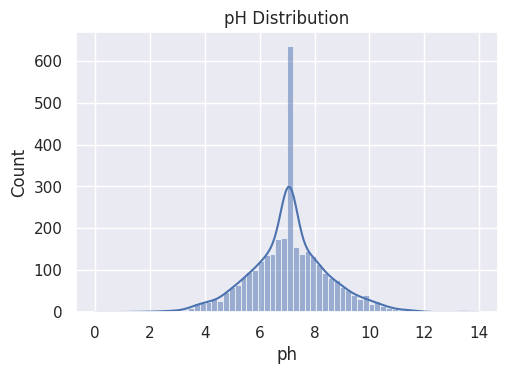

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['ph'], kde=True)
plt.title('pH Distribution')

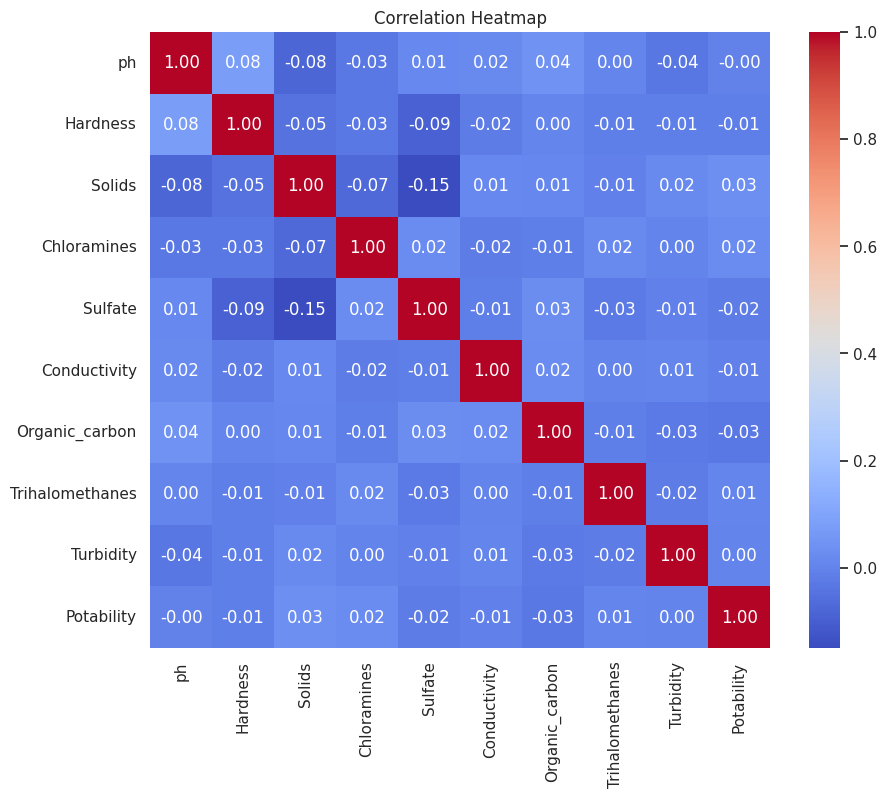

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

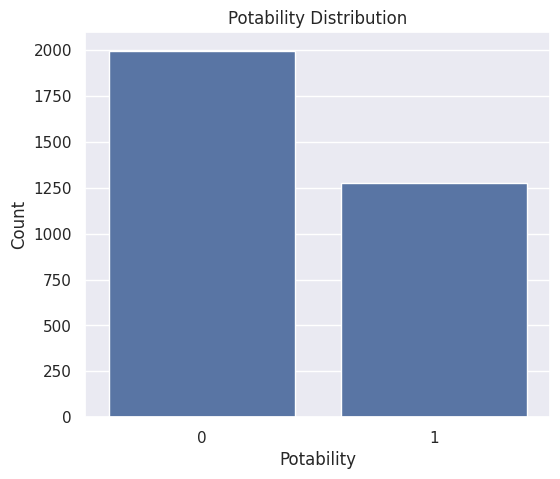

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Potability', data=df)
plt.title('Potability Distribution')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

# **Preprocessing**

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **Machine Learning**

In [ ]:
x=df.drop(['Potability'], axis=1)
y=df['Potability']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

class Classification_models:
  def __init__(self,x_train,x_test,y_train,y_test):
    self.x_train = x_train
    self.x_test = x_test
    self.y_train = y_train
    self.y_test = y_test

  def decisiontree(self):
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Decision Tree Classifier accuracy score: ',accuracy)
    return accuracy

  def RandomForestClassifier(self):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def Logistic(self):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Random Forest Classifier accuracy score: ',accuracy)
    return accuracy

  def SupertVector(self):
    from sklearn import svm
    model = svm.SVC().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('Support vector machines accuracy score: ',accuracy)
    return accuracy

  def KNeighborsClassifier(self):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print('KNeighbors Classifier accuracy score: ',accuracy)
    return accuracy

  def GaussianNaiveBayes(self):
    from sklearn.naive_bayes import GaussianNB
    model=GaussianNB().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Naive Bayes Classifier accuracy score: ",accuracy)
    return accuracy

  def GradientBoosting(self):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy  = accuracy_score(y_test,y_pred)
    print("Gradient Boosting Classifier accuracy score: ",accuracy)
    return accuracy

  def AdaBoost(self):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("AdaBoost Classifier accuracy score: ",accuracy)
    return accuracy

  def SGDClassifier(self):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("SGD Classifier accuracy score: ",accuracy)
    return accuracy

  def MLPClassifier(self):
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Neural network models accuracy score: ",accuracy)
    return accuracy

  def NearestCentroid(self):
    from sklearn.neighbors import NearestCentroid
    model = NearestCentroid().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("Nearest Neighbors accuracy score: ",accuracy)
    return accuracy

  def LGBMClassifier(self):
    from lightgbm import LGBMClassifier
    model = LGBMClassifier().fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print("LGBM Classifier accuracy score: ",accuracy)
    return accuracy

In [ ]:
model = Classification_models(x_train,x_test,y_train,y_test)
accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.RandomForestClassifier(),
    'SupertVector': model.SupertVector(),
    'KNeighborsClassifier' : model.KNeighborsClassifier(),
    'GaussianNaiveBayes' : model.GaussianNaiveBayes(),
    'GradientBoosting' : model.GradientBoosting(),
    'AdaBoost' : model.AdaBoost(),
    'SGDClassifier' : model.SGDClassifier(),
    'MLPClassifier' : model.MLPClassifier(),
    'NearestCentroid' : model.NearestCentroid(),
    'LGBMClassifier' : model.LGBMClassifier(),
    'Logistic' : model.Logistic()}

max_score_classifier = max(accuracy_scores, key=accuracy_scores.get)
max_accuracy_score = accuracy_scores[max_score_classifier]

print(f"\nMaximum accuracy score: {max_accuracy_score:.4f} achieved by {max_score_classifier} classifier.\n")

Decision Tree Classifier accuracy score:  0.6067073170731707
Random Forest Classifier accuracy score:  0.6676829268292683
Support vector machines accuracy score:  0.6097560975609756
KNeighbors Classifier accuracy score:  0.551829268292683
Naive Bayes Classifier accuracy score:  0.625
Gradient Boosting Classifier accuracy score:  0.6737804878048781
AdaBoost Classifier accuracy score:  0.6432926829268293
SGD Classifier accuracy score:  0.3902439024390244
Neural network models accuracy score:  0.6097560975609756
Nearest Neighbors accuracy score:  0.5548780487804879
[LightGBM] [Info] Number of positive: 1150, number of negative: 1798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2948, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390095 -> initscore=-0.44

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("LGBM Classifier accuracy score: ",accuracy)

[LightGBM] [Info] Number of positive: 1150, number of negative: 1798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2948, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390095 -> initscore=-0.446913
[LightGBM] [Info] Start training from score -0.446913
LGBM Classifier accuracy score:  0.698170731707317


In [ ]:
# Classification
kas = top_k_accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)

kas, ps, rs

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1802: UndefinedMetricWarning:

'k' (2) greater than or equal to 'n_classes' (2) will result in a perfect score and is therefore meaningless.



(1.0, 0.6464646464646465, 0.5)